In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# Waiting for the bus

When you are exploring a city, the public transportation is an awesome way to support civil infrastructure and reduce greenhouse gas emissions. One frustrating part about buses and trains is the act of waiting. When you look at the schedule, it may report that buses come every 60 min, so on average you should be waiting 30 minutes each time you arrive at a bus stop. **But** it feels like every time you get to the bus stop you are waiting on a late bus or you just missed the last one. Now, your wait time is more like 40-45 min on average. Is it just your bad luck? or is there something else happening here?

In [116]:
rng = default_rng(42)

N_trials = 1

N_buses = 1000

bus_arrival = np.array([float(i) for i in range(1,N_buses+1)])
bus_arrival

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
        100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,

In [117]:
bus_arrival += rng.normal(loc = 0, scale = 1/6, size = N_buses)

In [118]:
np.std(np.diff(bus_arrival))

0.22272842944629534

In [123]:
np.sqrt(2/36)

0.23570226039551584

> _Note:_ Propagation of error is $

In [120]:
from scipy.stats import norm

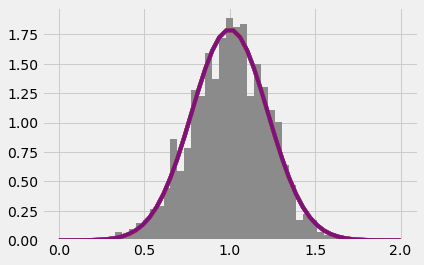

In [122]:

for i in range(1, 12, 2):
    x = np.linspace(0, 2)
    plt.hist(np.diff(bus_arrival),x, density = True)
    plt.plot(x, norm(1, 0.2227).pdf(x))

In [75]:
num_people = 10
people_arrival = rng.random((N_trials, N_buses, num_people))*12 - 1

people_arrival[0, :, :].shape

(12, 10)

In [70]:
np.mean(people_arrival[people_arrival< 0]*60)
np.size(people_arrival[people_arrival< 0])

88

In [76]:
for i, bus_time in enumerate(bus_arrival[0,:]):
    people_on_bus = np.size(people_arrival[
        np.logical_and(people_arrival>bus_time,
                       people_arrival<bus_arrival[i+1])])
    time_wait = np.mean(people_arrival[np.logical_and(people_arrival>bus_time, 
                                          people_arrival<bus_arrival[i+1])] - bus_time)*60 
    print('bus {} had {} that waited avg {} min'.format(i, people_on_bus, time_wait))

ValueError: operands could not be broadcast together with shapes (100,12,10) (12,) 

Allen Downey calls this the [Inspection Paradox](https://allendowney.blogspot.com/2015/08/the-inspection-paradox-is-everywhere.html). 

In [26]:
np.size(people_arrival[np.logical_and(people_arrival>1, people_arrival< 2)]*60)

1037

In [27]:
np.size(people_arrival[np.logical_and(people_arrival>2, people_arrival< 3)]*60)

995

In [28]:
np.size(people_arrival[np.logical_and(people_arrival>3, people_arrival< 4)]*60)

1012

In [28]:
np.size(people_arrival[np.logical_and(people_arrival>3, people_arrival< 4)]*60)

1012